In [1]:
import numpy as np
import pandas as pd
import time, os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from tensorboard.plugins.hparams import api as hp

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.models import Model

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split as split

import random
from math import floor
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from scipy.integrate import odeint
import scipy
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

In [21]:
df=pd.read_csv('data/jla.csv')
N = len(df.values)
randomize = np.random.permutation(N)
data = df.values[randomize]
N = len(df.values)
z = data[:,0] 
y = data[:,1:3] ### coge el resto de variables a predecir 
y[:,1] = y[:,1]**2+data[:,2]
np.shape(y)
df

,zcmb,mb,dmb,errors
0,0.503084,23.001698,0.088031,0.120219
1,0.580724,23.573937,0.090132,0.121435
2,0.494795,22.960139,0.088110,0.089552
3,0.345928,22.398137,0.087263,0.119729
4,0.677662,24.078115,0.098356,0.100088
...,...,...,...,...
735,0.027064,16.504006,0.141685,0.185894
736,0.025468,15.797848,0.143429,0.193666
737,0.023810,15.895501,0.144315,0.184957
738,0.023867,16.068268,0.144350,0.175960


In [23]:
dmag =df["dmb"]

df2=df['errors']+df['dmb']**2

In [4]:
scalerz = StandardScaler()
scalerz.fit(z.reshape(-1,1))
z = scalerz.transform(z.reshape(-1,1))

In [5]:
### Modificar para incluir phanteon como test
split = 0.75
ntrain = int(split * len(z))
indx = [ntrain]
X_train, X_test = np.split(z, indx)
Y_train, Y_test = np.split(y, indx)
np.shape(X_train), np.shape(X_test), Y_train.shape, Y_test.shape

((555, 1), (185, 1), (555, 2), (185, 2))

In [6]:
# loss -> val_loss
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                   min_delta=0.0,
                                   patience=10,
                                   restore_best_weights=True, verbose=True)
                                   ]

n_cols = 1

In [7]:
epochs=500

In [8]:
def train_test_model(hparams):    
    
    # Train LSTM model and predict on validation set
    model = tf.keras.Sequential()
    model.add(Input(shape=(int(X_train.shape[1]),)))
    model.add(Dense(hparams['HP_NUM_UNITS'], input_shape=(int(X_train.shape[1]),)))
    
    for i in range(hparams['HP_LAYERS']):        
        model.add(Dense(hparams['HP_NUM_UNITS'], activation='relu'))
    model.add(Dense(2, activation='linear'))
     
    optimizer = tf.keras.optimizers.Adam(learning_rate=hparams['HP_LEARNING'], beta_1=0.9, beta_2=0.999, epsilon=1e-3)
    model.compile(
            optimizer=optimizer,
            loss='mse', 
            metrics=['mean_squared_error'])
    
    # Run with 1 epoch to speed things up for demo purposes

    train = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test),
              callbacks=callbacks, batch_size=hparams['HP_BATCHSIZE'], shuffle=True, verbose=True)

    _, loss = model.evaluate(X_test, Y_test)
    
    return model, loss, train.history

# Grid results

- layers:4
- nodes: 200
- lr: 0.00010
- bs = 8

loss = 0.030958

In [9]:
hparams = {'HP_LAYERS': 4, 'HP_NUM_UNITS': 200, 'HP_BATCHSIZE': 8, 'HP_LEARNING':0.0001}

In [10]:
model, loss_test, history = train_test_model(hparams)

Epoch 1/500
70/70 [==============================] - 1s 8ms/step - loss: 214.1585 - mean_squared_error: 214.1585 - val_loss: 200.6070 - val_mean_squared_error: 200.6070
Epoch 2/500
70/70 [==============================] - 0s 4ms/step - loss: 122.1599 - mean_squared_error: 122.1599 - val_loss: 49.3777 - val_mean_squared_error: 49.3777
Epoch 3/500
70/70 [==============================] - 0s 4ms/step - loss: 43.8574 - mean_squared_error: 43.8574 - val_loss: 39.3477 - val_mean_squared_error: 39.3477
Epoch 4/500
70/70 [==============================] - 0s 4ms/step - loss: 31.9283 - mean_squared_error: 31.9283 - val_loss: 23.4255 - val_mean_squared_error: 23.4255
Epoch 5/500
70/70 [==============================] - 0s 3ms/step - loss: 16.7186 - mean_squared_error: 16.7186 - val_loss: 8.6613 - val_mean_squared_error: 8.6613
Epoch 6/500
70/70 [==============================] - 0s 4ms/step - loss: 5.5775 - mean_squared_error: 5.5775 - val_loss: 1.6525 - val_mean_squared_error: 1.6525
Epoch 7/50

70/70 [==============================] - 0s 4ms/step - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.0352 - val_mean_squared_error: 0.0352
Epoch 51/500
70/70 [==============================] - 0s 4ms/step - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.0653 - val_mean_squared_error: 0.0653
Epoch 52/500
70/70 [==============================] - 0s 4ms/step - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.0633 - val_mean_squared_error: 0.0633
Epoch 53/500
70/70 [==============================] - 0s 4ms/step - loss: 0.0602 - mean_squared_error: 0.0602 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 54/500
70/70 [==============================] - 0s 4ms/step - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 55/500
70/70 [==============================] - 0s 4ms/step - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 56/500
70/70 [=====================

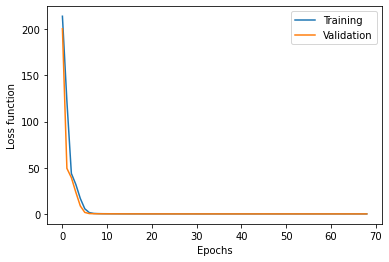

In [11]:
plt.plot(history['loss'], label='Training')
plt.plot(history['val_loss'], label='Validation')
plt.ylabel('Loss function')
plt.xlabel('Epochs')
plt.legend(loc='upper right')

In [12]:
loss_test

0.03159653767943382

# Genetic results

- layer = 2 	
- nodes = 100 	
- lr = 0.00010 	
- bs = 4 

loss = 0.033213

In [13]:
hparams_gen = {'HP_LAYERS': 2, 'HP_NUM_UNITS': 100, 'HP_BATCHSIZE': 4, 'HP_LEARNING':0.0001}

In [14]:
model_gen, loss_test_gen, history_gen = train_test_model(hparams_gen)

Epoch 1/500
139/139 [==============================] - 1s 4ms/step - loss: 208.6589 - mean_squared_error: 208.6589 - val_loss: 196.9956 - val_mean_squared_error: 196.9956
Epoch 2/500
139/139 [==============================] - 0s 3ms/step - loss: 158.3170 - mean_squared_error: 158.3170 - val_loss: 120.9467 - val_mean_squared_error: 120.9467
Epoch 3/500
139/139 [==============================] - 0s 3ms/step - loss: 73.4925 - mean_squared_error: 73.4925 - val_loss: 51.8348 - val_mean_squared_error: 51.8348
Epoch 4/500
139/139 [==============================] - 0s 3ms/step - loss: 40.3270 - mean_squared_error: 40.3270 - val_loss: 37.0651 - val_mean_squared_error: 37.0651
Epoch 5/500
139/139 [==============================] - 0s 3ms/step - loss: 31.4577 - mean_squared_error: 31.4577 - val_loss: 26.9205 - val_mean_squared_error: 26.9205
Epoch 6/500
139/139 [==============================] - 0s 3ms/step - loss: 22.3198 - mean_squared_error: 22.3198 - val_loss: 16.0641 - val_mean_squared_error

Epoch 50/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.0578 - val_mean_squared_error: 0.0578
Epoch 51/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 52/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 53/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 54/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 55/500
139/139 [==============================] - 0s 3ms/step - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 56/500
139

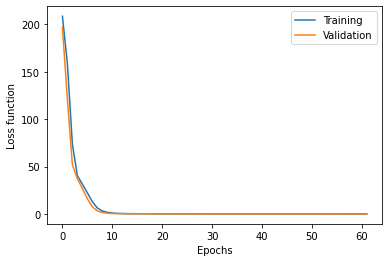

In [15]:
plt.plot(history_gen['loss'], label='Training')
plt.plot(history_gen['val_loss'], label='Validation')
plt.ylabel('Loss function')
plt.xlabel('Epochs')
plt.legend(loc='upper right')

In [16]:
loss_test_gen

0.04021205008029938

In [17]:
# ranz = np.random.uniform(0, 2, size=10000)
ranz = np.linspace(0, 1.5, 1000)
r = scalerz.transform(ranz.reshape(-1, 1))
pred_random_gen = model_gen.predict(r)
rr = scalerz.inverse_transform(r.reshape(-1,1))
pred_random_grid = model.predict(r)


(0.0, 1.3)

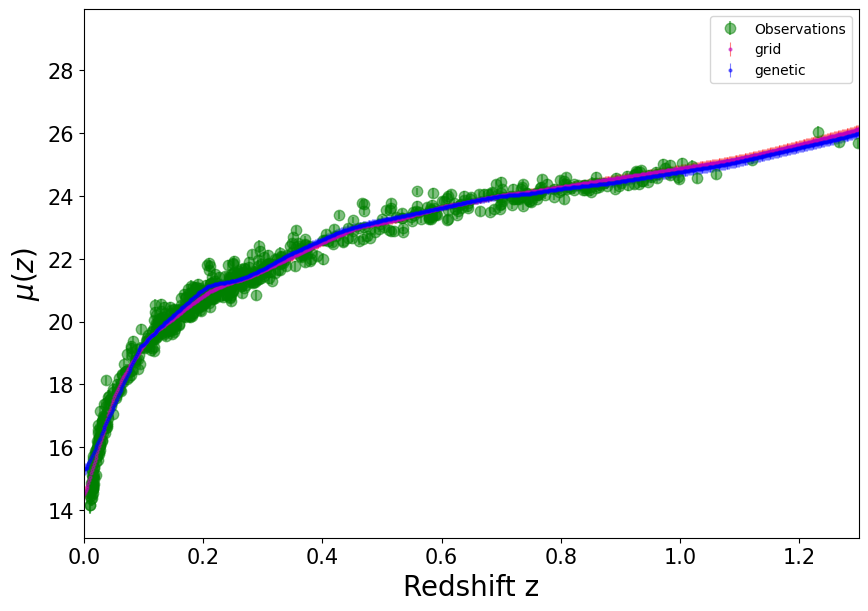

In [27]:
plt.figure(figsize=(10, 7), dpi=100)
plt.errorbar(df['zcmb'], df['mb'], df2, fmt='g.', markersize=15, label='Observations', alpha=0.5)
plt.errorbar(rr, pred_random_grid[:,0], pred_random_grid[:,1], markersize=2, fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.5, c='m', label='grid')
plt.errorbar(rr, pred_random_gen[:,0], pred_random_gen[:,1], markersize=2, fmt='o', 
             ecolor='b', capthick=2, elinewidth=0.8, alpha=0.5, c='b', label='genetic')
plt.xlabel("Redshift z", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()


plt.ylabel("$\mu(z)$", fontsize=20)
plt.xlim(0, 1.3)